# Agglomerative Clustering

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering #import UL
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler #standarisasi data

Disini kita akan membuat customer segmentation dari data customer sebuah toko kredit di Mall

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/Nazifatul-Fadhilah/Data/main/Mall_Customers.csv', index_col='CustomerID')

# EDA

In [3]:
data.shape

(200, 4)

In [4]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


pilih data angka saja

In [6]:
#Mengambil data dari dataframe untuk dijadikan vektor
X = data[['Annual Income (k$)', 'Spending Score (1-100)']].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [7]:
#Karena standar besar/kecil di kedua variabel berbeda, maka kita standarisasi dulu
#penjelasan detail akan dibahas di minggu selanjutnya
X = StandardScaler().fit_transform(X)
X

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

## 1 Membuat Dendogram
pilih metode linkage = complete



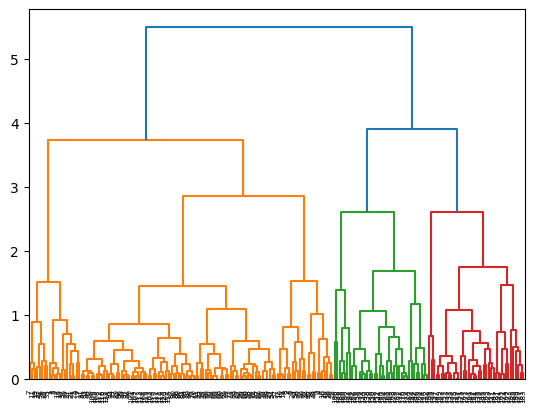

In [8]:
#Membuat Dendogram
dendrogram = sch.dendrogram(sch.linkage(X, method='complete'))

Terlihat bahwa garis cluster terpanjang saat cluster jumlah cluster = 7 atau 2

 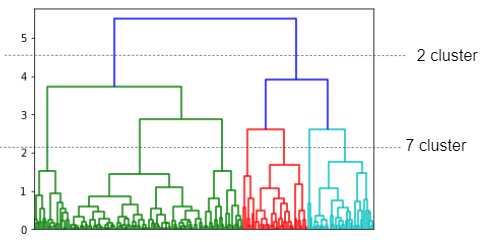

## 2 :    Membuat model Agglomerative Clustering


In [9]:
#Membuat Model Agglomerative Cluster, dengan n_cluster = 7, jarak euclidean, dan complete linkage
#Type Your Code Here
agglo = AgglomerativeClustering(n_clusters=7, affinity= 'euclidean', linkage='complete')
agglo.fit(X)
labels_agglo = agglo.labels_
labels_agglo

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 4,
       1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 5, 6, 5,
       6, 5])

## 3 :  Visualisasi Hasil Clustering  

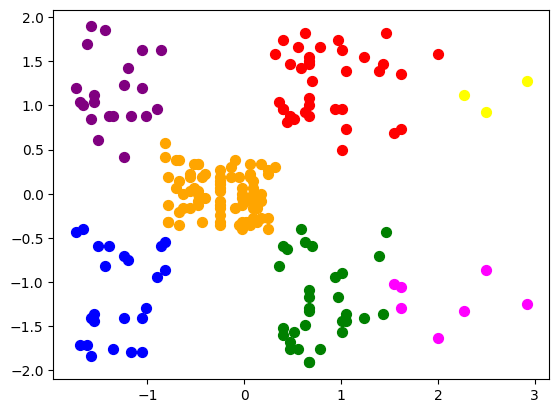

In [10]:
#Membuat visualisasi hasil clustering
#Type Your Code here
plt.scatter(X[labels_agglo==0, 0], X[labels_agglo==0, 1],s=50,marker='o',color='red')
plt.scatter(X[labels_agglo==1, 0], X[labels_agglo==1, 1],s=50,marker='o',color='blue')
plt.scatter(X[labels_agglo==2, 0], X[labels_agglo==2, 1],s=50,marker='o',color='green')
plt.scatter(X[labels_agglo==3, 0], X[labels_agglo==3, 1],s=50,marker='o',color='purple')
plt.scatter(X[labels_agglo==4, 0], X[labels_agglo==4, 1],s=50,marker='o',color='orange')
plt.scatter(X[labels_agglo==5, 0], X[labels_agglo==5, 1],s=50,marker='o',color='yellow')
plt.scatter(X[labels_agglo==6, 0], X[labels_agglo==6, 1],s=50,marker='o',color='magenta')
plt.show()


Kita bisa lihat hasil clusteringnya sudah bagus, terlihat antar cluster cukup terpisah (ga ada misalnya anggota cluster warna biru berada di tengah2 warna oren). Artinya kita bisa menggunakan hasil clustering ini

In [11]:
#Menambahkan hasil clustering ke dataframe
data['cluster_agglo'] = labels_agglo
data

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster_agglo
CustomerID,,,,,
1,Male,19,15,39,1
2,Male,21,15,81,3
3,Female,20,16,6,1
4,Female,23,16,77,3
5,Female,31,17,40,1
...,...,...,...,...,...
196,Female,35,120,79,5
197,Female,45,126,28,6
198,Male,32,126,74,5


## 4 :    Cari rata-rata per cluster


In [12]:
#Mencari rata-rata per cluster
#Type Your Code Here
for i in range(max(labels_agglo)+1):
  print('cluster ke-', i)
  print('rata-rata pemasukan = ', data[data['cluster_agglo']==i]['Annual Income (k$)'].mean(),
        ', rata-rata pengeluaran = ',data[data['cluster_agglo']==i]['Spending Score (1-100)'].mean())

cluster ke- 0
rata-rata pemasukan =  83.11111111111111 , rata-rata pengeluaran =  82.41666666666667
cluster ke- 1
rata-rata pemasukan =  26.304347826086957 , rata-rata pengeluaran =  20.91304347826087
cluster ke- 2
rata-rata pemasukan =  80.74193548387096 , rata-rata pengeluaran =  18.516129032258064
cluster ke- 3
rata-rata pemasukan =  25.095238095238095 , rata-rata pengeluaran =  80.04761904761905
cluster ke- 4
rata-rata pemasukan =  54.41772151898734 , rata-rata pengeluaran =  50.21518987341772
cluster ke- 5
rata-rata pemasukan =  127.66666666666667 , rata-rata pengeluaran =  78.66666666666667
cluster ke- 6
rata-rata pemasukan =  114.71428571428571 , rata-rata pengeluaran =  19.142857142857142


Sehingga, bisa kita simpulkan bahwa :    
*   Cluster 0 adalah kelompok keuangan menengah ke-atas, baik secara pemasukan maupun pengeluaran
*   Cluster 1 adalah kelompok keuangan rendah bawah, baik secara pemasukan maupun pengeluaran
*   Cluster 2 adalah kelompok yang baik dalam menabung, pemasukannya lumayan namun pengeluarannya sangat rendah
*   Cluster 3 adalah kelompok yang boros, pemasukannya rendah namun pengeluarannya cukup besar
*   Cluster 4 adalah kelompok menengah ke-bawah, baik secara pemasukan maupun pengeluaran
*   Cluster 5 adalah kelompok yang kaya, namun pengeluarannya juga lumayan
*   Cluster 6 adalah kelompok yang kaya dan hemat, pengeluarannya sangat kecil


